In [52]:
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rot_hist_loc = '/media/rene/data/equivariance/mnist/batch_avae_mnist_L8_rotate_save_hist/the_only_rot_history.pkl'
with open(rot_hist_loc, 'rb') as f:
    rot_hist = pickle.load(f)

In [42]:
# for k, v in rot_hist.items():
#     print(k)

# (affine_params, target, rot) = rot_dict[epoch][batch_idx]

print(len(rot_hist[1][0]))
print(len(rot_hist[1][0][0]))
print(rot_hist[1][0][0][0])
print(rot_hist[1][0][0][1])
print(rot_hist[1][0][0][2])

print(math.acos(rot_hist[1][0][0][0][0, 0])*180/math.pi)
print(rot_hist[1][0][1][0])
print(rot_hist[1][0][2][0])


3
128
[[ 0.840348   -0.54204726  0.        ]
 [ 0.54204726  0.840348    0.        ]]
[[ 0.6853964  -0.72817016  0.        ]
 [ 0.72817016  0.6853964   0.        ]]
[[ 0.7286577   0.68487805  0.        ]
 [-0.68487805  0.7286577   0.        ]]
32.823113616522456
4.0
178


In [51]:
def reformat_rot_hist(rot_hist, epoch):
    data = pd.DataFrame()
    # 100 batches is enough
    for batch_idx in range(100):
        affine_params = rot_hist[epoch][batch_idx]
        target = rot_hist[epoch][batch_idx]
        rot = rot_hist[epoch][batch_idx]
        # grab all the stuff from inside each batch
        for img_idx in range(len(rot_hist[epoch][batch_idx][0])):
            affine_params = rot_hist[epoch][batch_idx][0][img_idx]
            target = rot_hist[epoch][batch_idx][1][img_idx]
            rot = rot_hist[epoch][batch_idx][2][img_idx]
            data = data.append({
                                'actual_rot': rot,
                                'affine_rot': math.acos(affine_params[0, 0])*180/math.pi,
                                'target': target,
                            }, ignore_index=True)    
    return data

ep1_data = reformat_rot_hist(rot_hist, epoch=1)
ep1_data.head()

,actual_rot,affine_rot,target
0,178.0,32.823114,4.0
1,244.0,46.733212,7.0
2,41.0,43.226016,4.0
3,195.0,140.232937,1.0
4,252.0,126.620015,1.0


In [60]:
ep1_data['rot_off_center'] = ep1_data['affine_rot'] - ep1_data['actual_rot']
ep1_data['rot_off_center'] = ep1_data['rot_off_center'] % 360
data = ep1_data[ep1_data['target'] == 0]
print(len(ep1_data), len(data))

data.head()

12800 1214


,actual_rot,affine_rot,target,rot_off_center
14,183.0,142.123327,0.0,319.123327
20,35.0,139.250730,0.0,104.250730
29,277.0,39.658936,0.0,122.658936
32,154.0,40.552951,0.0,246.552951
36,161.0,134.714339,0.0,333.714339


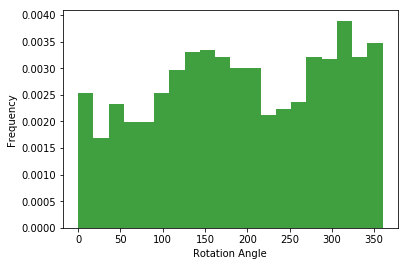

In [80]:
ep1_data['rot_off_center'] = ep1_data['affine_rot'] - ep1_data['actual_rot']
ep1_data['rot_off_center'] = ep1_data['rot_off_center'] % 360
data = ep1_data[ep1_data['target'] == 0]

n, bins, patches = plt.hist(data['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

# plt.savefig('/media/rene/code/equivariance/imgs/tmp_hist.png', bbox='tight')

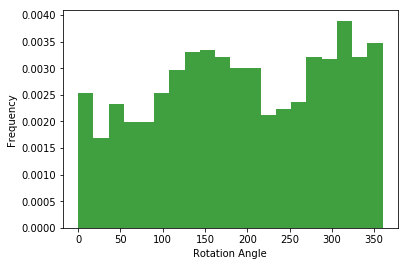

In [81]:
ep1_data = reformat_rot_hist(rot_hist, epoch=50)
ep1_data['rot_off_center'] = ep1_data['affine_rot'] - ep1_data['actual_rot']
ep1_data['rot_off_center'] = ep1_data['rot_off_center'] % 360
data = ep1_data[ep1_data['target'] == 0]

n, bins, patches = plt.hist(data['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

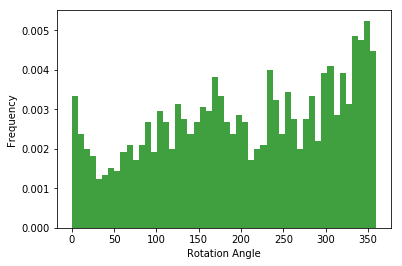

In [68]:
data = ep1_data[ep1_data['target'] == 1]

n, bins, patches = plt.hist(data['rot_off_center'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

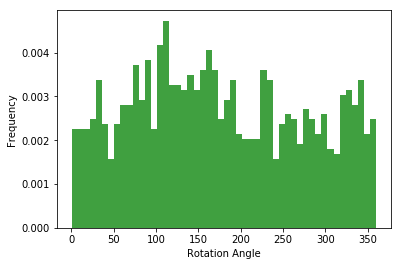

In [69]:
data = ep1_data[ep1_data['target'] == 2]

n, bins, patches = plt.hist(data['rot_off_center'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

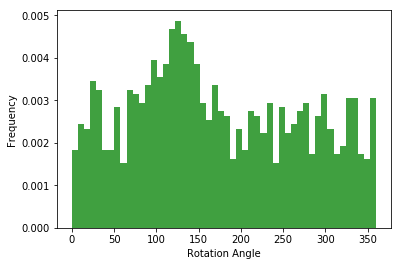

In [70]:
data = ep1_data[ep1_data['target'] == 3]

n, bins, patches = plt.hist(data['rot_off_center'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

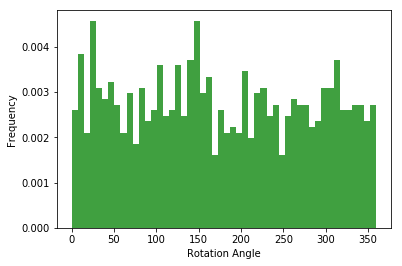

In [71]:
data = ep1_data[ep1_data['target'] == 5]

n, bins, patches = plt.hist(data['rot_off_center'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

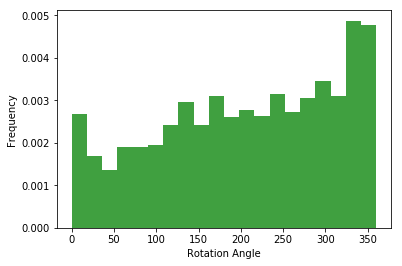

In [79]:
data = ep1_data[ep1_data['target'] == 9]

n, bins, patches = plt.hist(data['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Rotation Angle')
plt.ylabel('Frequency')
plt.show()

In [89]:
def compare_rotations(rot_hist, epochs=[1, 15, 30, 59], target=1):
    
    fig, ax = plt.subplots(len(epochs), 1, figsize=(8,12))#, sharex='col', sharey='row',figsize=(10,10))
    
    for i,  epoch in enumerate(epochs):
        data = reformat_rot_hist(rot_hist, epoch)
        data = data[data['target'] == target]
        data['rot_off_center'] = data['affine_rot'] - data['actual_rot']
        data['rot_off_center'] = data['rot_off_center'] % 360
        
        ax[i].hist(data['rot_off_center'], 20, density=True, facecolor='g', alpha=0.75)
#         ax[epoch].xlabel('Rotation Angle')
#         ax[epoch].ylabel('Frequency')
    plt.show()

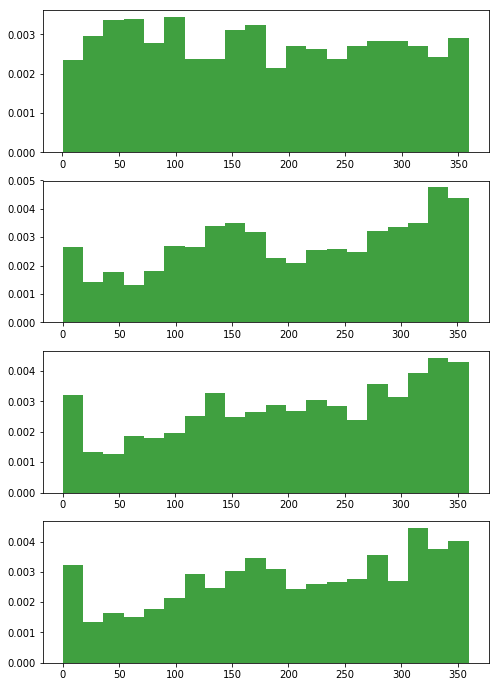

In [90]:
compare_rotations(rot_hist, epochs=[1, 15, 30, 59], target=1)